# <font color=#cd0000> Propósito principal </font>
- La idea de este librillo es comprobar el desempeño de Random Forest sobre el conjunto de datos HeartBeat con la codificación de la `Tendencia` y la `Aceleración`.

## <font color=#cd0000> Leyenda </font>
- Los apartados titulados con el código de colores HEX: `#cd0000` serán apartados que tendrán todos los librillos, en concreto, aquellos especificados en el apartado `Síntesis de los criterios usados` del trabajo.
- Los apartados titulados con el código de colores HEX: `#2451ff` serán apartados de conclusiones propias de este librillo resultado de aplicar un estudio personalizado para cada planteamiento.

# <font color=#cd0000> Prerrequisitos </font>
## <font color=#cd0000> Entorno de ejecución </font>
- Cambiamos el directorio raíz del librillo para acceder cómodamente a las funciones de utilidad.

In [1]:
import os

os.chdir('../../../../')
os.listdir()


['.git',
 '.gitignore',
 '.gitmodules',
 'data',
 'pkl',
 'Pruebas',
 'README.md',
 'smts_implementation',
 'utils']

## <font color=#cd0000> Constantes y variables predefinidas </font>

In [3]:
HEARTBEAT_PATH = "data/heartbeat"

DATA_TO_SAVE = "HeartBeat"

PKL_DIR = "pkl/RF/HeartBeat/"
PKL_NAME = "heartbeat_RF_trend_acc.pkl"

SEED = 1


# <font color=#cd0000> Carga del Dataset </font>

In [4]:
from utils.load_data import import_heartbeat_dataset

train, test = import_heartbeat_dataset(HEARTBEAT_PATH)

In [5]:
import pickle

pickle.dump(train, open(DATA_TO_SAVE + "_tmp_train_data.pkl", 'wb'))
pickle.dump(test, open(DATA_TO_SAVE + "_tmp_test_data.pkl", 'wb'))


In [6]:
import pickle

train = pickle.load(open(DATA_TO_SAVE + "_tmp_train_data.pkl", 'rb'))
test = pickle.load(open(DATA_TO_SAVE + "_tmp_test_data.pkl", 'rb'))


In [7]:
train.reset_changes()
test.reset_changes()


# <font color=#cd0000> Preprocesamiento </font>

## <font color=#cd0000> Eliminación de datos inválidos y valores atípicos </font>
- Como ya anticipamos en el análisis en profundidad de este conjunto de datos eliminaremos todos los atributos dado su alto grado de correlación salvo los atributos: `signal_1`, `signal_10`, `signal_20`, `signal_30`, `signal_40`, `signal_50` y `signal_60`
- Eliminaremos aquellos valores fuera de los percentiles 5 y 95.

### <font color=#2451ff> Eliminación de atributos altamente correlacionados </font>

In [8]:
columns_to_remove = train.get_derived_data_columns()['attrs']
column_to_study = ['signal_1', 'signal_10', 'signal_20',
                   'signal_30', 'signal_40', 'signal_50', 'signal_60']

for col in columns_to_remove:
    if col in column_to_study:
        columns_to_remove.remove(col)

train.drop_derived_data_columns(columns_to_remove)
test.drop_derived_data_columns(columns_to_remove)


,id,TimeStamp,signal_1,signal_10,signal_20,signal_30,signal_40,signal_50,signal_60,class
0,0,0,0.004578,0.009483,0.003414,0.009437,0.008221,0.030211,1.000400,normal
1,0,1,0.011682,0.013566,0.004089,0.012686,0.012927,0.070100,0.673670,normal
2,0,2,0.017709,0.019086,0.011413,0.030151,0.039722,0.100600,0.904520,normal
3,0,3,0.016318,0.017490,0.016408,0.044615,0.059496,0.091279,1.322500,normal
4,0,4,0.011723,0.008481,0.008594,0.025718,0.030744,0.024211,1.622600,normal
...,...,...,...,...,...,...,...,...,...,...
83020,204,400,0.007057,0.001993,0.005595,0.003932,0.002723,0.002055,0.353420,abnormal
83021,204,401,0.012607,0.002142,0.004760,0.000763,0.002429,0.001636,0.349890,abnormal
83022,204,402,0.011410,0.004370,0.000505,0.000902,0.002300,0.001022,0.264820,abnormal
83023,204,403,0.008735,0.003033,0.001830,0.001835,0.004181,0.002472,0.130270,abnormal


### <font color=#2451ff> Eliminación de outliers </font>
- El grado de outliers mínimo en, al menos, una dimensión para eliminar una serie temporal será del 80% (si más del 80% de los datos son anómalos descartamos la serie).
  - A pesar de que esto pueda parecer muy grande debemos comprender que, la probabilidad con la que aparezca ruido en una de las dimensiones de una serie temporal multivariada, es muy alta (tenemos varias series temporales con ruido cada una).

In [9]:
train.remove_outliers(
    headers=train.get_derived_data_columns()['attrs'],
    outliers_limit=.8
)

test.remove_outliers(
    headers=test.get_derived_data_columns()['attrs'],
    outliers_limit=.8
)


In [10]:
import pandas as pd

# Remaining series
print("Train: Previous number of series: {}".format(
    len(pd.unique(train.original_data['id']))))
print("Train: Actual number of series: {}".format(
    len(pd.unique(train.derived_data['id']))))

print("Test: Previous number of series: {}".format(
    len(pd.unique(test.original_data['id']))))
print("Test: Actual number of series: {}".format(
    len(pd.unique(test.derived_data['id']))))


Train: Previous number of series: 204
Train: Actual number of series: 198
Test: Previous number of series: 205
Test: Actual number of series: 199


## <font color=#cd0000> Resoluciones a aplicar </font>
- Como concluimos en el análisis en profundidad, mantendremos la resolución original.

In [11]:
# Nothing to see here


# <font color=#cd0000> División en ventanas </font>
- Como concluimos en el análisis en profundidad no aplicaremos enventanado pues ya está preaplicado.

In [12]:
# Nothing to see here


## <font color=#cd0000> Codificación </font>

In [13]:
from utils.codifications import temporal_trend_fn

# Trend's codification (first derivative)
train.apply_codifications([temporal_trend_fn])
test.apply_codifications([temporal_trend_fn])


In [14]:
# Acceleration's codification (second derivative)
columns_to_derivate = list(filter(lambda z: 'Diff' in z, 
                               train.get_derived_data_columns()['attrs']))

train.apply_codifications([temporal_trend_fn], headers=columns_to_derivate)
test.apply_codifications([temporal_trend_fn], headers=columns_to_derivate)


# <font color=#cd0000> Preparación de los datos </font>

In [16]:
X_train = train.derived_data.drop(['id', 'class'], axis=1)
X_test = test.derived_data.drop(['id', 'class'], axis=1)

y_train = train.derived_data['class'].to_numpy()
y_test = test.derived_data['class'].to_numpy()

## <font color=#cd0000> Técnicas de balanceo </font>

### <font color=#cd0000> Asignación de pesos a las clases </font>

In [17]:
import numpy as np
from sklearn.utils import compute_class_weight

class_weights = compute_class_weight(
    'balanced', classes=np.unique(y_train), y=y_train)
class_weights = {'abnormal': class_weights[0], 'normal': class_weights[1]}


# <font color=#cd0000> Diseño de la topología del bosque </font>
- Número de estimadores inicial recomendado
- Profundidad máxima recomendada

## <font color=#cd0000> Entrenamiento </font>

In [28]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=100,
    random_state=SEED,
    class_weight=class_weights
)
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight={'abnormal': 0.7021276595744681,
                                     'normal': 1.736842105263158},
                       max_depth=100, n_estimators=200, random_state=1)

## <font color=#cd0000> Clasificación </font>

In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

y_pred = clf.predict(X_test)
y_true = np.asarray(y_test)
    
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, zero_division=0))


[[54381  3248]
 [19645  2923]]
              precision    recall  f1-score   support

    abnormal       0.73      0.94      0.83     57629
      normal       0.47      0.13      0.20     22568

    accuracy                           0.71     80197
   macro avg       0.60      0.54      0.51     80197
weighted avg       0.66      0.71      0.65     80197



## <font color=#cd0000> Discusión de los resultados </font>
- Vamos a estudiar diferentes rangos de hiper-parámetros interesantes que podrían darnos alguna pista sobre el rango en el que buscar el mejor clasificador de este tipo:
  - Para un `n_estimators` pequeño (10) y una `max_depth` pequeño (10) observamos resultados bastante similares a los obtenidos para la aplicación de únicamente la `Tendencia`:
    ```
    Confusion matrix:
    [[55300  2329]
     [20240  2328]]

    Classification report:
                    precision    recall  f1-score   support

        abnormal       0.73      0.96      0.83     57629
          normal       0.50      0.10      0.17     22568

        accuracy                           0.72     80197
       macro avg       0.62      0.53      0.50     80197
    weighted avg       0.67      0.72      0.64     80197
    ```
  - Para un `n_estimators` pequeño (10) y una `max_depth` grande (200) observamos que los resultados mejoran ligeramente, probemos a cambiar el `n_estimators`:
    ```
    Confusion matrix:
    [[52610  5019]
     [18831  3737]]

    Classification report:
                    precision    recall  f1-score   support

        abnormal       0.74      0.91      0.82     57629
          normal       0.43      0.17      0.24     22568

        accuracy                           0.70     80197
       macro avg       0.58      0.54      0.53     80197
    weighted avg       0.65      0.70      0.65     80197
    ```
  - Para un `n_estimators` grande (200) y una `max_depth` pequeño (10) observamos un desempeño notablemente mejor aunque empeora la clasificación de la clase mayoritaria:
    ```
    Confusion matrix:
    [[34240 23389]
     [ 7529 15039]]

    Classification report:
                    precision    recall  f1-score   support

        abnormal       0.82      0.59      0.69     57629
          normal       0.39      0.67      0.49     22568

        accuracy                           0.61     80197
       macro avg       0.61      0.63      0.59     80197
    weighted avg       0.70      0.61      0.63     80197
    ```
  - Para un `n_estimators` grande (200) y una `max_depth` grande (200) observamos que los resultados empeoran así que probemos un `max_depth` intermedio:
    ```
    Confusion matrix:
    [[54381  3248]
     [19645  2923]]

    Classification report:
                    precision    recall  f1-score   support

        abnormal       0.73      0.94      0.83     57629
          normal       0.47      0.13      0.20     22568

        accuracy                           0.71     80197
       macro avg       0.60      0.54      0.51     80197
    weighted avg       0.66      0.71      0.65     80197
    ```
  - Para un `n_estimators` grande (200) y una `max_depth` intermedio (100) observamos que empeoran los resultados:
    ```
    Confusion matrix:
    [[54381  3248]
     [19645  2923]]

    Classification report:
                    precision    recall  f1-score   support

        abnormal       0.73      0.94      0.83     57629
          normal       0.47      0.13      0.20     22568

        accuracy                           0.71     80197
       macro avg       0.60      0.54      0.51     80197
    weighted avg       0.66      0.71      0.65     80197
    ```

## <font color=#cd0000> Conclusiones </font>
- Como podemos observar ni con esta codificación el clasificador RandomForest es capaz de mejorar en la tarea de clasificación con respecto a la clasificación de las series en bruto (`HeartBeat_RF_Raw.ipynb`) y, de nuevo, esto se debe a que no tiene en cuenta el orden de las secuencias con el uso de la técnica Bagging.
- No obstante si no tuviéramos más remedio que utilizarlo de esta forma buscaríamos el mejor en el rango orientativo:
  - `n_estimators`: [100, 200]
  - `max_depth`: [10, 100]

# <font color=#cd0000> Randomized Search </font>
- Búsqueda de hiper-parámetros aleatoria con RF maximizando ``macro avg f1-score``

## <font color=#cd0000> Rangos de búsqueda </font>
- Como vimos anteriormente los rangos de búsqueda aleatoria de los mejores hiper-parámetros serán los siguientes

In [33]:
N_ESTIMATORS_RANGE = range(100, 200)
MAX_DEPTH_RANGE = range(10, 100)

In [34]:
import random
import pickle
import utils.constants as cs
from sklearn.ensemble import RandomForestClassifier
from utils.classifier_utils import (windowed_cross_val,
                                    compute_classification_reports_means)
from utils.plot_utils import pretty_print_classification_report_dict


def rf_randomized_search_cv(
        windowed_series,
        relation_with_series,
        prefix,
        class_weights,
        cv=5):
    global PKL_DIR
    all_clf_used = {}

    n_samples = 5
    n_estimators_list = random.sample(list(N_ESTIMATORS_RANGE), n_samples)
    max_depth_list = random.sample(list(MAX_DEPTH_RANGE), n_samples)

    best_hyp_params = None
    best_score = 0
    for n_estimators in n_estimators_list:
        for max_depth in max_depth_list:
            clf = RandomForestClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                random_state=SEED,
                class_weight=class_weights
            )

            reports = windowed_cross_val(
                clf,
                windowed_series,
                relation_with_series,
                estimator_type=cs.ESTIMATOR_SKLEARN,
                cv=cv,
                drop_columns=['id', 'class'],
                seed=SEED
            )
            mean_report = compute_classification_reports_means(reports)
            all_clf_used[(n_estimators, max_depth)] = mean_report

            if mean_report['macro avg']['f1-score'][0] >= best_score:
                best_score = mean_report['macro avg']['f1-score'][0]
                best_hyp_params = (n_estimators, max_depth)
                best_report = mean_report

            print("\t\t--------------ACTUAL BEST: N_Estimators={}; Max_Depth={}--------------"
                  .format(best_hyp_params[0], best_hyp_params[1]))
            pretty_print_classification_report_dict(best_report)
            print("\t\t--------------ITERATION: N_Estimators={}; Max_Depth={}--------------"
                  .format(n_estimators, max_depth))
            pretty_print_classification_report_dict(mean_report)

    with open(PKL_DIR + prefix, 'wb') as file:
        pickle.dump(all_clf_used, file)

    return best_hyp_params, best_report


In [35]:
rf_randomized_search_cv(
    train.derived_data,
    train.derived_data_windows_per_serie,
    PKL_NAME,
    class_weights,
    cv=5)


		--------------ACTUAL BEST: N_Estimators=144; Max_Depth=69--------------
Accuracy: 0.7133164236038538 +/- 0.05258875239055772
abnormal:
	precision: 0.7306779130262522 +/- 0.06512249861788307
	recall: 0.9482035410808848 +/- 0.025674025526036568
	f1-score: 0.8231938343015475 +/- 0.03993820492815261
	support: 11364.6 +/- 1122.62809514104
normal:
	precision: 0.5469771978898181 +/- 0.12153761244820044
	recall: 0.14064134376789464 +/- 0.03363212213205283
	f1-score: 0.21592105708022297 +/- 0.033884563212538424
	support: 4594.2 +/- 973.8935054717225
macro avg:
	precision: 0.6388275554580352 +/- 0.048668252487015326
	recall: 0.5444224424243898 +/- 0.00918394124658323
	f1-score: 0.5195574456908852 +/- 0.031008772501310403
	support: 15958.8 +/- 410.98097279557845
weighted avg:
	precision: 0.6866738778300444 +/- 0.04274819676272014
	recall: 0.7133164236038538 +/- 0.05258875239055772
	f1-score: 0.6494200058869031 +/- 0.07067261376281969
	support: 15958.8 +/- 410.98097279557845
		--------------ITER

((157, 33),
 {'accuracy': (0.7120465215828456, 0.05282813233932949),
  'abnormal': {'precision': (0.7321359297955725, 0.06603561338730582),
   'recall': (0.9418748617023777, 0.02927018915955981),
   'f1-score': (0.8215763909807888, 0.04018281043656296),
   'support': (11364.6, 1122.62809514104)},
  'normal': {'precision': (0.5405825075077594, 0.12162624537464303),
   'recall': (0.15343935634258216, 0.036972103283100494),
   'f1-score': (0.2299489887557556, 0.034042153783424345),
   'support': (4594.2, 973.8935054717225)},
  'macro avg': {'precision': (0.636359218651666, 0.05142742011225688),
   'recall': (0.54765710902248, 0.010835095656589603),
   'f1-score': (0.5257626898682722, 0.032616979369834806),
   'support': (15958.8, 410.98097279557845)},
  'weighted avg': {'precision': (0.6854598198728811, 0.04677249441939067),
   'recall': (0.7120465215828456, 0.05282813233932949),
   'f1-score': (0.6519938498443117, 0.0710222749131358),
   'support': (15958.8, 410.98097279557845)}})

# <font color=#cd0000> Randomized Search con múltiples ejecuciones en lugar de Validación Cruzada </font>
- No llevaremos a cabo esta aproximación ya que tenemos datos suficientes como para ejecutar validación cruzada.

In [20]:
# Nothing to see here

# <font color=#cd0000> Análisis de resultados </font>
- Según la búsqueda aleatoria de hiper-parámetros, la mejor combinación, es la de ``n_estimators`` = 157 y ``max_depth`` = 33:
    ```
        Accuracy: 0.7120465215828456 +/- 0.05282813233932949
        abnormal:
            precision: 0.7321359297955725 +/- 0.06603561338730582
            recall: 0.9418748617023777 +/- 0.02927018915955981
            f1-score: 0.8215763909807888 +/- 0.04018281043656296
            support: 11364.6 +/- 1122.62809514104
        normal:
            precision: 0.5405825075077594 +/- 0.12162624537464303
            recall: 0.15343935634258216 +/- 0.036972103283100494
            f1-score: 0.2299489887557556 +/- 0.034042153783424345
            support: 4594.2 +/- 973.8935054717225
        macro avg:
            precision: 0.636359218651666 +/- 0.05142742011225688
            recall: 0.54765710902248 +/- 0.010835095656589603
            f1-score: 0.5257626898682722 +/- 0.032616979369834806
            support: 15958.8 +/- 410.98097279557845
        weighted avg:
            precision: 0.6854598198728811 +/- 0.04677249441939067
            recall: 0.7120465215828456 +/- 0.05282813233932949
            f1-score: 0.6519938498443117 +/- 0.0710222749131358
            support: 15958.8 +/- 410.98097279557845
    ```
- Ahora vamos a visualizar la evolución de los resultados (25 resultados) para observar cómo avanza nuestra métrica objetivo -> Macro Average F1-Score.

In [39]:
import pickle

all_reports = pickle.load(open(PKL_DIR + PKL_NAME, 'rb'))


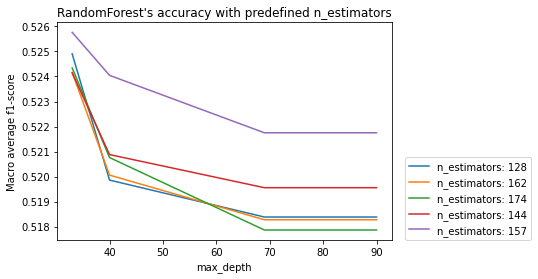

In [44]:
from utils.plot_utils import plot_score

macro_avg_f1_scores = dict(map(
    lambda z: (z, {'score': all_reports[z]['macro avg']['f1-score'][0],
                   'std': all_reports[z]['macro avg']['f1-score'][1]}),
    all_reports
))

plot_score(
    [macro_avg_f1_scores],
    ('n_estimators', 'max_depth'),
    'RandomForest',
    inverse=True,
    mode='score',
    in_same_graphic=True,
    accuracy_mode='accuracy',
    metric_name='Macro Average F1-Score'
)


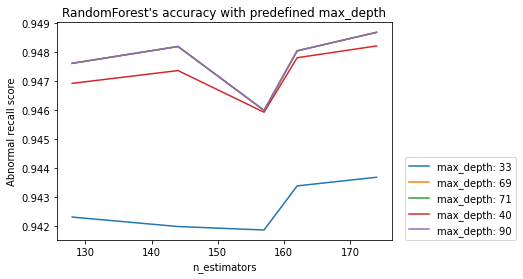

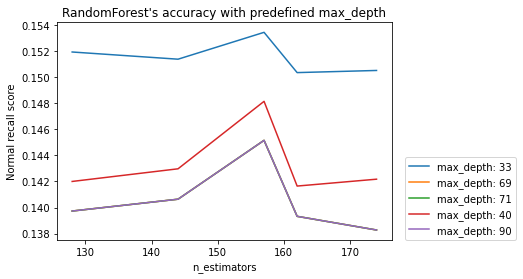

In [41]:
abnormal_recall_scores = dict(map(
    lambda z: (z, {'score': all_reports[z]['abnormal']['recall'][0],
                   'std': all_reports[z]['abnormal']['recall'][1]}),
    all_reports
))

normal_recall_scores = dict(map(
    lambda z: (z, {'score': all_reports[z]['normal']['recall'][0],
                   'std': all_reports[z]['normal']['recall'][1]}),
    all_reports
))

plot_score(
    [abnormal_recall_scores],
    ('n_estimators', 'max_depth'),
    'RandomForest',
    inverse=False,
    mode='score',
    in_same_graphic=True,
    accuracy_mode='accuracy',
    metric_name='Abnormal recall score'
)

plot_score(
    [normal_recall_scores],
    ('n_estimators', 'max_depth'),
    'RandomForest',
    inverse=False,
    mode='score',
    in_same_graphic=True,
    accuracy_mode='accuracy',
    metric_name='Normal recall score'
)


## <font color=#cd0000> Evaluación sobre el conjunto de validación </font>
- Vamos a llevar a cabo la evaluación final sobre el conjunto de validación (esto es lo que irá al apartado de ``Pruebas y Resultados`` de la memoria).

### <font color=#cd0000> Entrenamiento </font>

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=157,
    max_depth=33,
    class_weight=class_weights,
    random_state=SEED
)
clf.fit(X_train, y_train)


RandomForestClassifier(class_weight={'abnormal': 0.7021276595744681,
                                     'normal': 1.736842105263158},
                       max_depth=33, n_estimators=157, random_state=1)

### <font color=#cd0000> Clasificación </font>

In [43]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

y_pred = clf.predict(X_test)
y_true = np.asarray(y_test)
    
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, zero_division=0))


[[53925  3704]
 [19228  3340]]
              precision    recall  f1-score   support

    abnormal       0.74      0.94      0.82     57629
      normal       0.47      0.15      0.23     22568

    accuracy                           0.71     80197
   macro avg       0.61      0.54      0.53     80197
weighted avg       0.66      0.71      0.66     80197



# <font color=#cd0000> Conclusiones </font>
- Como podemos observar en los gráficos obtenidos en el apartado de análisis de resultados, cuanto más profundo son los árboles del bosque peor clasifica la clase minoritaria y esto puede darse a que el bosque se sobreajusta significativamente y se limita a clasificar mejor los ejemplos de la clase mayoritaria.
- No obstante, frente al conjunto de validación el mejor clasificador es aquel con una profundidad máxima menor que generaliza mejor los datos de la clase minoritaria.
- Sin embargo, como ya veíamos anteriormente, este clasificador con la codificación actual no es el adecuado para enfrentarse a esta tarea de clasificación como consecuencia de la distribución aleatoria de los datos de cada serie entre los estimadores usando la técnica Bagging. 